# Life Expectancy Analysis

Life expectancy is a critical indicator of a country's health and well-being. It represents the average number of years a person is expected to live based on current mortality rates in a population. Identifying the factors that influence life expectancy helps policymakers, healthcare providers, and governments design effective interventions to improve public health.

This analysis explores the key predictors of life expectancy using a comprehensive dataset. The study focuses on the following research questions:

1. **Key Predictors**: Which variables have the strongest positive or negative correlations with life expectancy?  
2. **Healthcare Expenditure**: Should countries with lower life expectancy increase healthcare spending to improve lifespan?  
3. **Mortality Rates**: How do adult mortality and infant mortality rates affect life expectancy?  
4. **Lifestyle and Habits**: What relationship exists between alcohol consumption, lifestyle factors, and life expectancy?  
5. **Education**: How does schooling influence life expectancy?  
6. **Population Density**: Do countries with higher population density experience lower life expectancy?  
7. **Immunization**: What is the impact of immunization coverage (e.g., Polio, Hepatitis B, Diphtheria) on life expectancy?

This analysis provides insights into the socioeconomic, healthcare, and lifestyle variables that shape life expectancy. The study uses visualizations, statistical measures, and correlations to identify relationships and patterns that can guide data-driven decision-making.

---

## Data Source
The dataset used in this analysis is publicly available on Kaggle:
[Life Expectancy Dataset](https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who)

---

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set up visual style
sns.set(style="whitegrid")

In [2]:
df = pd.read_csv('Life Expectancy Data.csv')
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

## Data Cleaning

In [4]:
#checking for missing values
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [5]:
#checking for the percentage of missing values
df.isnull().sum()/df.shape[0]*100

Country                             0.000000
Year                                0.000000
Status                              0.000000
Life expectancy                     0.340368
Adult Mortality                     0.340368
infant deaths                       0.000000
Alcohol                             6.603131
percentage expenditure              0.000000
Hepatitis B                        18.822328
Measles                             0.000000
 BMI                                1.157250
under-five deaths                   0.000000
Polio                               0.646698
Total expenditure                   7.692308
Diphtheria                          0.646698
 HIV/AIDS                           0.000000
GDP                                15.248468
Population                         22.191967
 thinness  1-19 years               1.157250
 thinness 5-9 years                 1.157250
Income composition of resources     5.684139
Schooling                           5.547992
dtype: flo

In [6]:
#checking for duplicates
df.duplicated().sum()

0

In [7]:
df.describe(include="object")

,Country,Status
count,2938,2938
unique,193,2
top,Afghanistan,Developing
freq,16,2426


In [16]:
df.columns = df.columns.str.strip()

In [17]:
# 1. Does various predicting factors really affect Life Expectancy?
print("Correlation of predicting factors with Life Expectancy:")
correlations = df.corr()['Life expectancy'].sort_values(ascending=False)
print(correlations)

Correlation of predicting factors with Life Expectancy:
Life expectancy                    1.000000
Schooling                          0.751975
Income composition of resources    0.724776
BMI                                0.567694
Diphtheria                         0.479495
Polio                              0.465556
GDP                                0.461455
Alcohol                            0.404877
percentage expenditure             0.381864
Hepatitis B                        0.256762
Total expenditure                  0.218086
Year                               0.170033
Population                        -0.021538
Measles                           -0.157586
infant deaths                     -0.196557
under-five deaths                 -0.222529
thinness 5-9 years                -0.471584
thinness  1-19 years              -0.477183
HIV/AIDS                          -0.556556
Adult Mortality                   -0.696359
Name: Life expectancy, dtype: float64


### Top Predictors of Life Expectancy
This bar plot below shows the correlation coefficients between life expectancy and other predictors (like GDP, schooling, healthcare expenditure, etc.). A higher positive correlation indicates that the variable has a strong positive influence on life expectancy. Negative values suggest an inverse relationship. The analysis helps identify key factors influencing life expectancy.

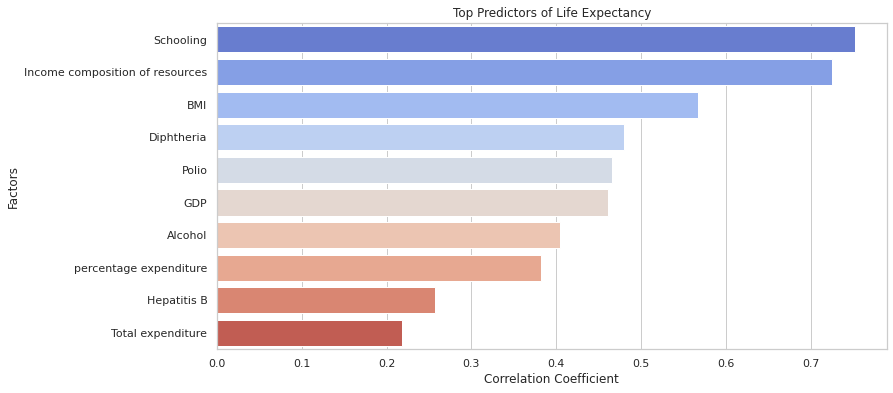

In [18]:
# Visualize top predictors of Life Expectancy
top_predictors = correlations.dropna().iloc[1:11]  # Top 10 predictors excluding 'Life expectancy'
plt.figure(figsize=(12, 6))
sns.barplot(x=top_predictors.values, y=top_predictors.index, palette='coolwarm')
plt.title("Top Predictors of Life Expectancy")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Factors")
plt.show()

### Healthcare Expenditure vs Life Expectancy (<65 years)
This scatter plot focuses on countries with a life expectancy below 65 years. It examines whether increasing healthcare expenditure could improve life expectancy. A positive trend would suggest that investing more in healthcare might lead to an increase in the average lifespan.


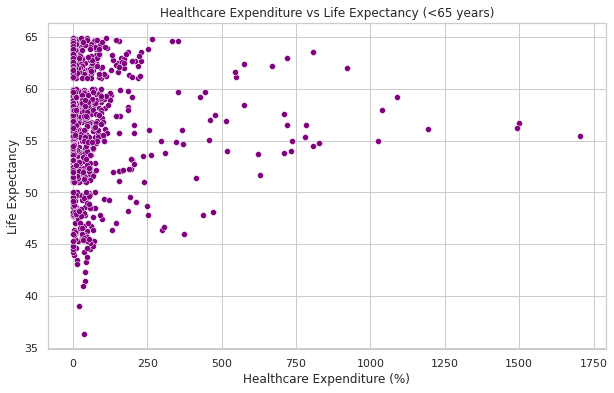

In [22]:
# 2. Healthcare expenditure vs Life Expectancy (<65 life expectancy countries)
low_life_expectancy = df[df['Life expectancy'] < 65]
plt.figure(figsize=(10, 6))
sns.scatterplot(x='percentage expenditure', y='Life expectancy', data=low_life_expectancy, color='purple')
plt.title('Healthcare Expenditure vs Life Expectancy (<65 years)')
plt.xlabel('Healthcare Expenditure (%)')
plt.ylabel('Life Expectancy')
plt.show()

### Impact of Mortality on Life Expectancy
These scatter plots explore how adult mortality and infant deaths affect life expectancy:
- **Adult Mortality**: A higher adult mortality rate often leads to a significant drop in life expectancy.
- **Infant Deaths**: Increased infant mortality rates are likely to reduce the overall life expectancy of a country.
The relationship is expected to be strongly negative.


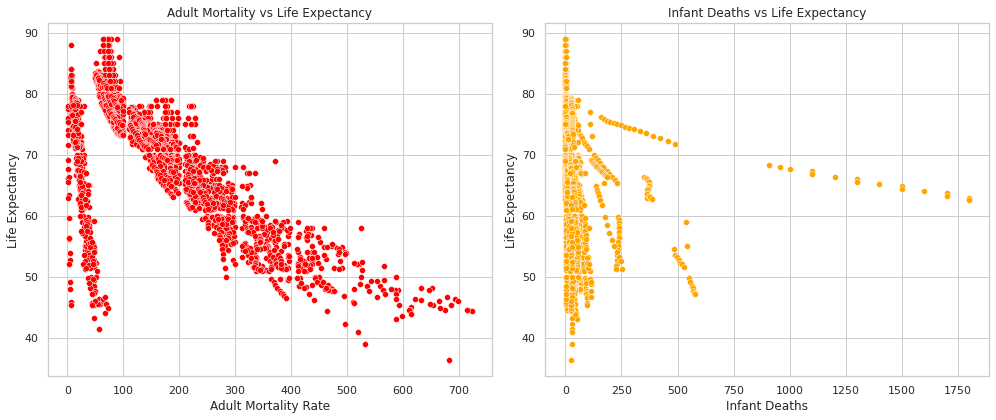

In [25]:
# 3. Impact of Infant and Adult Mortality on Life Expectancy
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.scatterplot(ax=axes[0], x='Adult Mortality', y='Life expectancy', data=df, color='red')
axes[0].set_title("Adult Mortality vs Life Expectancy")
axes[0].set_xlabel("Adult Mortality Rate")
axes[0].set_ylabel("Life Expectancy")

sns.scatterplot(ax=axes[1], x='infant deaths', y='Life expectancy', data=df, color='orange')
axes[1].set_title("Infant Deaths vs Life Expectancy")
axes[1].set_xlabel("Infant Deaths")
axes[1].set_ylabel("Life Expectancy")

plt.tight_layout()
plt.show()

### Alcohol Consumption vs Life Expectancy
This scatter plot evaluates whether alcohol consumption has a positive or negative correlation with life expectancy. Excessive alcohol consumption is often associated with health issues that may reduce lifespan, but moderate consumption might show varying effects.


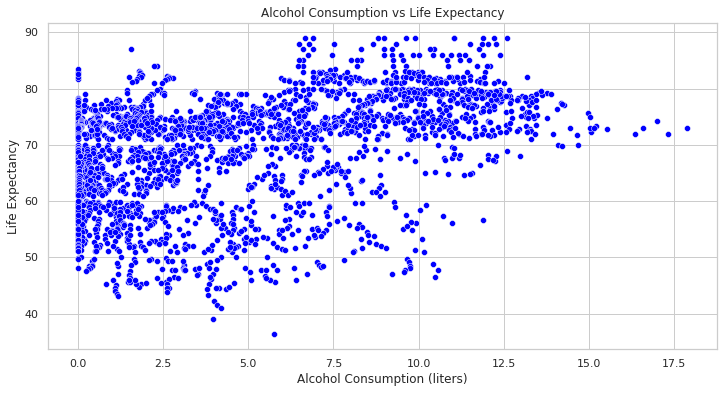

In [26]:
# 4. Impact of eating habits/lifestyle factors on Life Expectancy
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Alcohol', y='Life expectancy', data=df, color='blue')
plt.title('Alcohol Consumption vs Life Expectancy')
plt.xlabel('Alcohol Consumption (liters)')
plt.ylabel('Life Expectancy')
plt.show()

### Impact of Schooling on Life Expectancy
This scatter plot examines the relationship between years of schooling and life expectancy. Education often leads to better awareness of health practices, access to resources, and overall improved living standards, which can increase life expectancy.


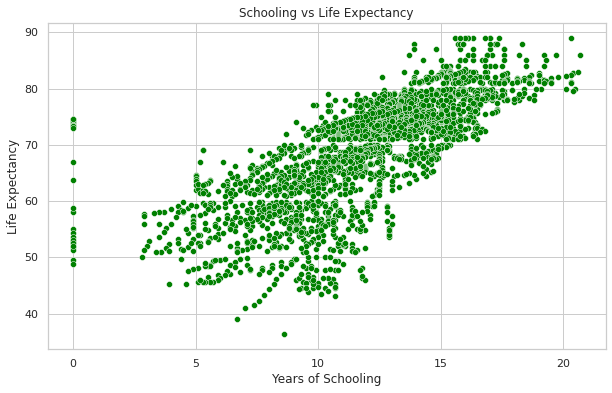

In [27]:
# 5. Schooling vs Life Expectancy
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Schooling', y='Life expectancy', data=df, color='green')
plt.title('Schooling vs Life Expectancy')
plt.xlabel('Years of Schooling')
plt.ylabel('Life Expectancy')
plt.show()

### Population Density vs Life Expectancy
This scatter plot investigates whether densely populated countries tend to have lower life expectancy. Overpopulation can lead to strained resources, poor living conditions, and inadequate healthcare, which might negatively impact lifespan.


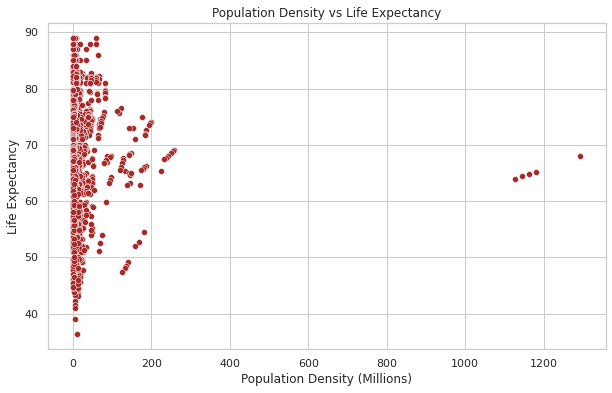

In [30]:
# 6. Population Density Impact on Life Expectancy
df['Population Density'] = df['Population'] / 1e6  # Convert population to millions
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Population Density', y='Life expectancy', data=df, color='brown')
plt.title('Population Density vs Life Expectancy')
plt.xlabel('Population Density (Millions)')
plt.ylabel('Life Expectancy')
plt.show()

### Impact of Immunization Coverage on Life Expectancy
These scatter plots analyze the relationship between immunization rates for Hepatitis B, Polio, and Diphtheria and life expectancy. Higher immunization coverage is expected to improve public health, reduce mortality rates, and increase life expectancy.


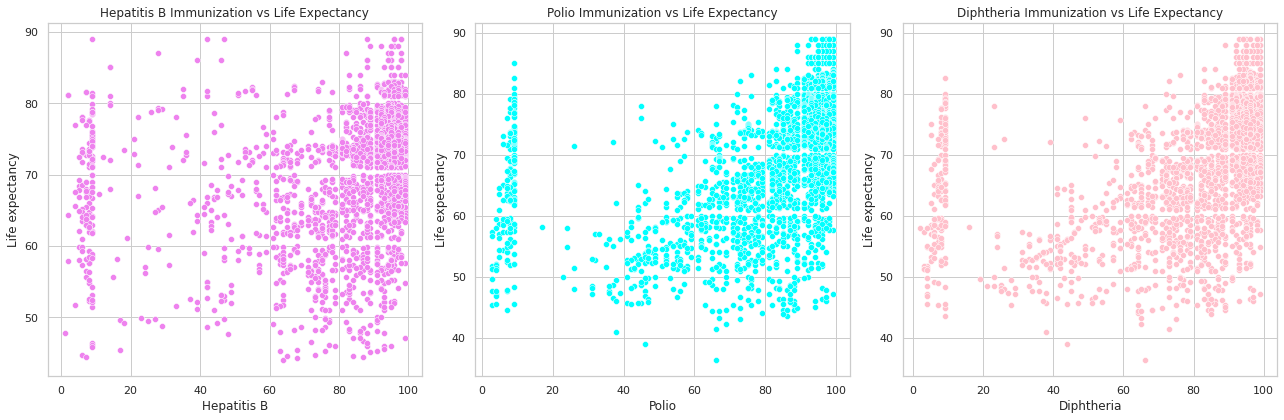

In [32]:
# 7. Impact of Immunization Coverage
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
sns.scatterplot(ax=axes[0], x='Hepatitis B', y='Life expectancy', data=df, color='violet')
axes[0].set_title("Hepatitis B Immunization vs Life Expectancy")

sns.scatterplot(ax=axes[1], x='Polio', y='Life expectancy', data=df, color='cyan')
axes[1].set_title("Polio Immunization vs Life Expectancy")

sns.scatterplot(ax=axes[2], x='Diphtheria', y='Life expectancy', data=df, color='pink')
axes[2].set_title("Diphtheria Immunization vs Life Expectancy")

plt.tight_layout()
plt.show()